# Problem Statement:
The objective of this project is to assess credit risk by predicting loan repayment outcomes (loan_status) using borrower and loan-related features. The dataset contains information such as borrower demographics, income, loan intent, credit history, and loan details.

- To ensure a robust analysis:
    - Exploratory data analysis (EDA) was performed to understand patterns and relationships within the data.
    - Missing values were handled using a predictive model specifically designed for imputation, ensuring minimal data loss and accurate representations.
    - Multiple machine learning models were trained and evaluated to identify the best-performing approach for predicting loan repayment outcomes.

The final model aims to assist financial institutions in making data-driven decisions regarding loan approvals and risk mitigation.

In [78]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# Exploratory Data Analysis

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


From above, we can see that there are total 32581 records in the dataset and two columns (loan_int_rate and person_emp_length) have some values missing

In [86]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


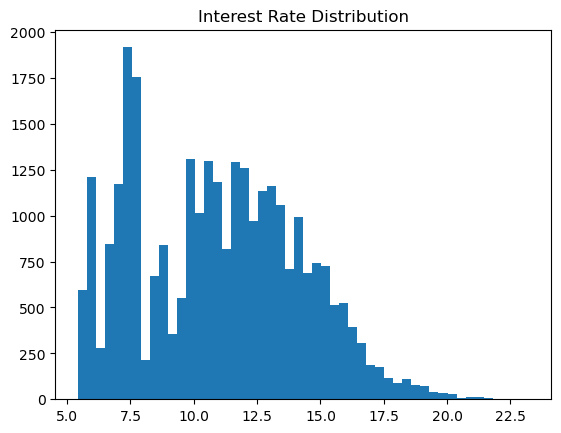

In [88]:
plt.hist(df['loan_int_rate'], bins=50)
plt.title('Interest Rate Distribution')
plt.show()

This chart shows the distribution of interest rates (loan_int_rate) across the dataset. The majority of loans seem to have interest rates between 7% and 13%, with fewer loans at extreme interest rates. This suggests a concentration around the average rate.

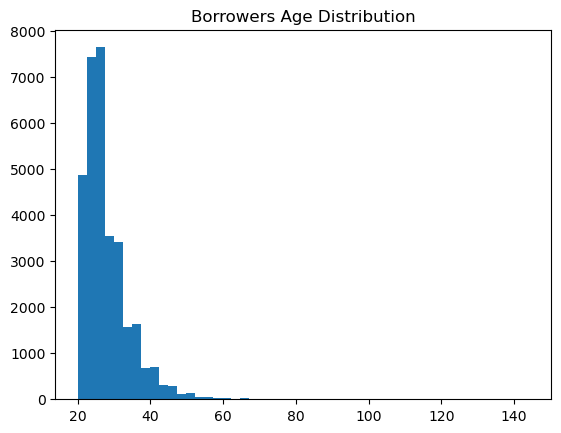

In [60]:
plt.hist(df['person_age'], bins=50)
plt.title('Borrowers Age Distribution')
plt.show()

This graph illustrates the age distribution of borrowers (person_age). The dataset is dominated by younger borrowers, typically in their 20s and early 30s, with a sharp decline in older age groups.

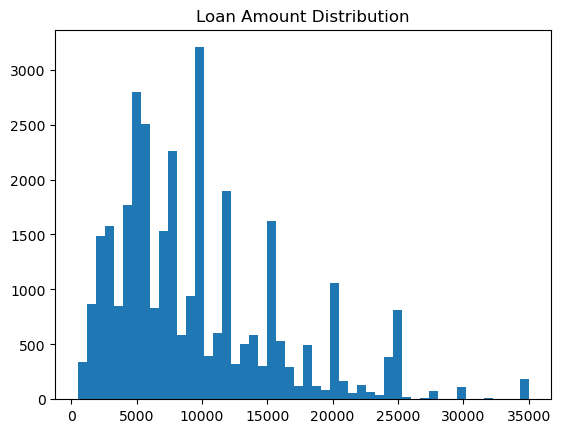

In [62]:
plt.hist(df['loan_amnt'], bins=50)
plt.title('Loan Amount Distribution')
plt.show()

This plot depicts the distribution of loan amounts (loan_amnt). Most loans are concentrated around smaller amounts, with a noticeable peak between 5,000 and 12,000, indicating typical borrowing behavior.

C:\Users\invok\AppData\Local\Temp\ipykernel_19036\4282466864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='Set2')


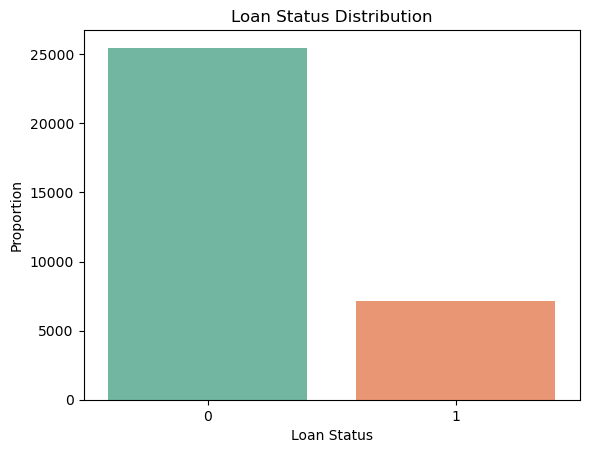

In [64]:
# Visualize the distribution
sns.countplot(data=df, x='loan_status', palette='Set2')
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Proportion")
plt.show()


This countplot compares the number of loans that were fully paid (loan_status = 0) versus those that defaulted (loan_status = 1). The dataset contains significantly more fully paid loans than defaults, suggesting an imbalance in the target variable.

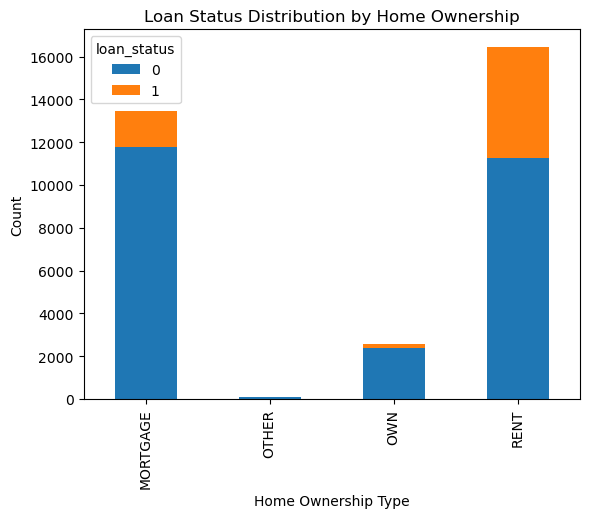

In [66]:
loan_status_grouped = df.groupby(['person_home_ownership', 'loan_status']).size().unstack(fill_value=0)

loan_status_grouped.plot(kind='bar', stacked=True)
plt.title('Loan Status Distribution by Home Ownership')
plt.xlabel('Home Ownership Type')
plt.ylabel('Count')
plt.show()

In [95]:
This chart shows the relationship between home ownership types (person_home_ownership) and loan status. Borrowers who rent (RENT) or own (OWN) homes seem to account for the majority of loans, with a higher proportion of defaults observed in certain ownership categories.

SyntaxError: invalid syntax (3708650017.py, line 1)

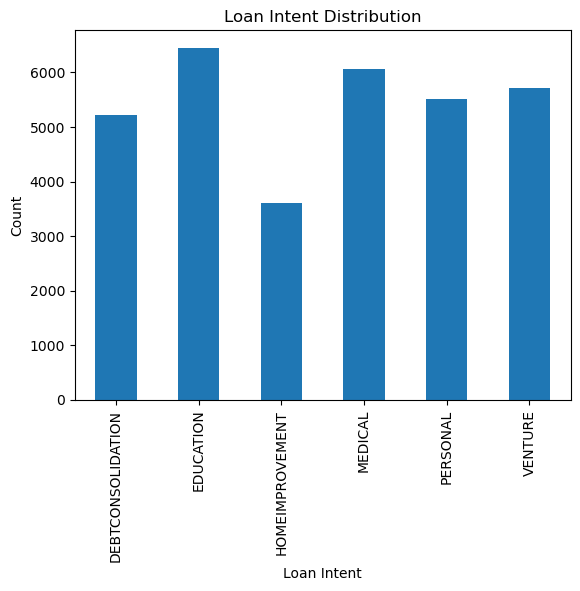

In [68]:
loan_intent_grouped = df.groupby('loan_intent').size()

loan_intent_grouped.plot(kind='bar')
plt.title('Loan Intent Distribution')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.show()

This bar chart visualizes the primary purposes (loan_intent) for which loans were taken. Categories like PERSONAL, EDUCATION, and MEDICAL are prominent, with personal loans being the most frequent.

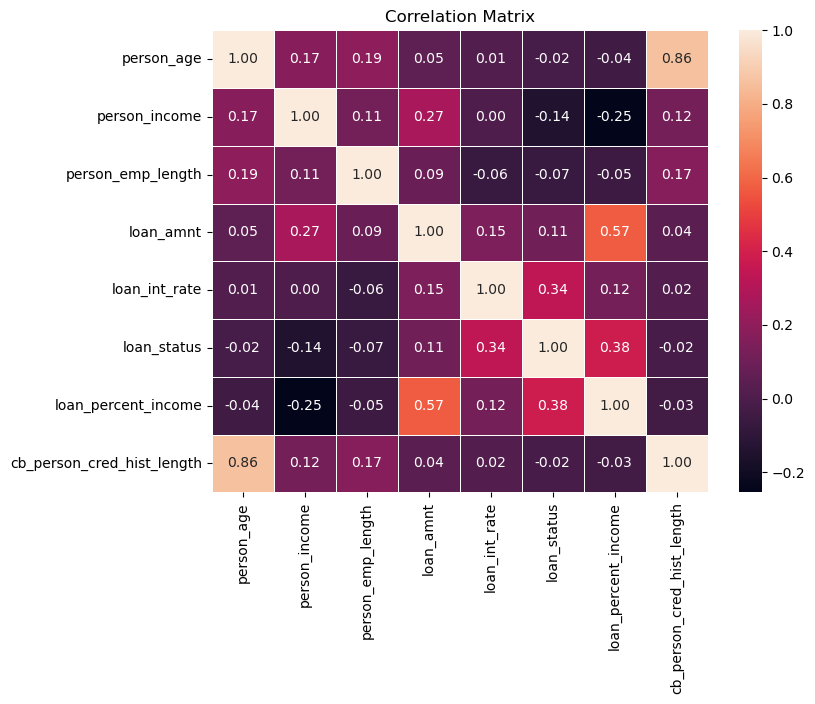

In [70]:
numerical_cols = df.select_dtypes(include=['number'])

correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

This heatmap displays the correlation between numerical variables in the dataset. Strong relationships, such as between loan_amnt and loan_percent_income, may hint at predictive features. Low correlations suggest minimal redundancy.

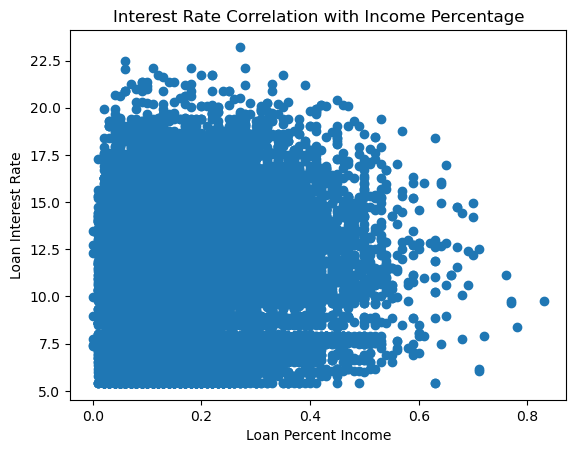

In [72]:
plt.scatter(df['loan_percent_income'], df['loan_int_rate'])
plt.title('Interest Rate Correlation with Income Percentage')
plt.xlabel('Loan Percent Income')
plt.ylabel('Loan Interest Rate')
plt.show()

This scatter plot explores the relationship between loan_int_rate and loan_percent_income. A slight trend may exist, with higher income percentages generally corresponding to higher interest rates.

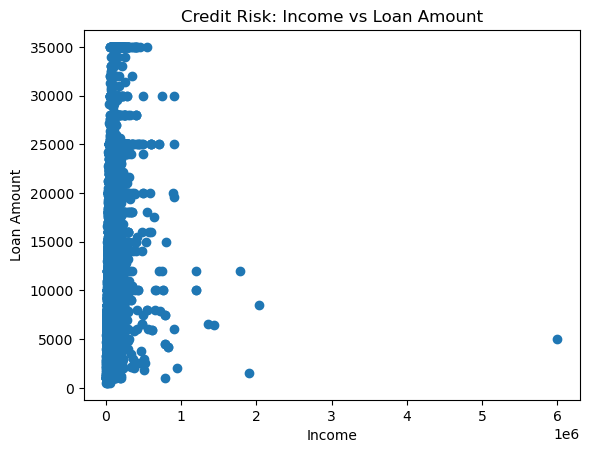

In [74]:
plt.scatter(df['person_income'], df['loan_amnt'])
plt.title('Credit Risk: Income vs Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

This scatter plot examines the relationship between borrowers' income (person_income) and loan amounts. Higher incomes are loosely associated with higher loan amounts, but there’s significant variance.

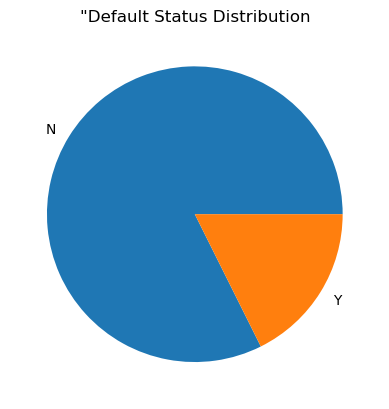

In [76]:
cb_person_onfile_grouped = df.groupby('cb_person_default_on_file').size()

cb_person_onfile_grouped.plot(kind='pie')
plt.title('"Default Status Distribution')
plt.show()

This pie chart breaks down the distribution of borrowers with and without prior defaults (cb_person_default_on_file). It highlights the proportion of individuals with no default history as the majority.

# Data Preprocessing and Data imputation using auxiliary model

In 1 record we can see age is 22 but person_emp_length is 123 so that's not possible, so will have to solve that problem

In [ ]:
''' Let's create a function which considers 16 as minimum age to work and in the records like 1 one we can assign person_emp_lenth that numbe of years'''
from sklearn.impute import SimpleImputer
for index, row in df.iterrows():
    age_classifier = row['person_age'] - row['person_emp_length']
    if age_classifier < 16 or pd.isna(row['person_emp_length']):
        df.loc[index, 'person_emp_length'] = row['person_age'] - 16 # In df.iterrows function, row contains copy of our df data so changing in row cannot change our dataframe

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


preprocessor = ColumnTransformer(
    transformers=[
        ('encoded_data', OneHotEncoder(drop='first', sparse_output=False), [2, 4, 5, 10]),
        ('scaled_data', StandardScaler(), [0,1,3,6,7,9,11])
    ],
    remainder='drop'
)


In [17]:
processed_data = preprocessor.fit_transform(df)
processed_data.shape

(32581, 22)

In [18]:
cat_feature_names = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
encoded_column_names = preprocessor.named_transformers_['encoded_data'].get_feature_names_out(cat_feature_names)

num_columns = df.columns[[0, 1, 3, 6, 7, 9, 11]]
scaled_column_names = num_columns

final_column_names = np.concatenate([np.array(encoded_column_names), np.array(scaled_column_names)])

df_1 = pd.DataFrame(processed_data)
df_1.columns = final_column_names
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_home_ownership_OTHER  32581 non-null  float64
 1   person_home_ownership_OWN    32581 non-null  float64
 2   person_home_ownership_RENT   32581 non-null  float64
 3   loan_intent_EDUCATION        32581 non-null  float64
 4   loan_intent_HOMEIMPROVEMENT  32581 non-null  float64
 5   loan_intent_MEDICAL          32581 non-null  float64
 6   loan_intent_PERSONAL         32581 non-null  float64
 7   loan_intent_VENTURE          32581 non-null  float64
 8   loan_grade_B                 32581 non-null  float64
 9   loan_grade_C                 32581 non-null  float64
 10  loan_grade_D                 32581 non-null  float64
 11  loan_grade_E                 32581 non-null  float64
 12  loan_grade_F                 32581 non-null  float64
 13  loan_grade_G    

In [19]:
# target_col = df['loan_status']
# df_1 = pd.concat([df_1, target_col], axis=1, ignore_index=True)
# df_1.head(5)
df_1['loan_status'] = df['loan_status']

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_home_ownership_OTHER  32581 non-null  float64
 1   person_home_ownership_OWN    32581 non-null  float64
 2   person_home_ownership_RENT   32581 non-null  float64
 3   loan_intent_EDUCATION        32581 non-null  float64
 4   loan_intent_HOMEIMPROVEMENT  32581 non-null  float64
 5   loan_intent_MEDICAL          32581 non-null  float64
 6   loan_intent_PERSONAL         32581 non-null  float64
 7   loan_intent_VENTURE          32581 non-null  float64
 8   loan_grade_B                 32581 non-null  float64
 9   loan_grade_C                 32581 non-null  float64
 10  loan_grade_D                 32581 non-null  float64
 11  loan_grade_E                 32581 non-null  float64
 12  loan_grade_F                 32581 non-null  float64
 13  loan_grade_G    

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
train_data = df_1[df_1[df_1.columns[19]].notna()]
predict_data = df_1[df_1[df_1.columns[19]].isna()]  

In [23]:
X_train = train_data.drop(train_data.columns[19], axis=1)
y_train = train_data[train_data.columns[19]]

In [24]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train_split, y_train_split)

y_pred = model.predict(X_test_split)

# Evaluate performance
mse = mean_squared_error(y_test_split, y_pred)
r2 = r2_score(y_test_split, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 0.09487639649143956
R-squared Score: 0.9076913940281383


In [26]:
x_redict = predict_data.drop(predict_data.columns[19], axis=1)

predictions = model.predict(x_redict)

In [27]:
df_1.loc[df_1[df_1.columns[19]].isna(), df_1.columns[19]] = predictions

In [28]:
df_1

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,...,loan_grade_G,cb_person_default_on_file_Y,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-0.903374,-0.114143,0.252277,4.019404,1.545580,3.931411,-0.691554,1
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,-1.060904,-0.911147,0.014673,-1.358650,0.039595,-0.657458,-0.938167,0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-0.430783,-0.911147,-0.935743,-0.646849,0.573479,3.744110,-0.691554,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,-0.745843,-0.009274,-0.222931,4.019404,1.301784,3.369508,-0.938167,1
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,-0.588313,-0.188358,0.727485,4.019404,1.005524,3.556809,-0.444942,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,4.610190,-0.210945,-0.935743,-0.599395,0.662974,-0.563808,5.966992,0
32577,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,4.137599,0.870011,-0.222931,1.271060,-1.086807,-0.189207,3.254251,0
32578,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,5.870433,0.160129,-0.460535,4.019404,-0.006695,2.713956,5.473767,1
32579,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,4.452660,1.354021,0.014673,0.855843,0.144521,-0.657458,4.980541,0


# Model

In [30]:
df_1['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

To address the class imbalance in loan_status, I chose to balance the classes by undersampling the dominant class to ensure that both classes are equally represented. This approach was selected because the minority class (loan_status = 1) already contains 7,108 records, which is a substantial amount of data.

While techniques like SMOTE (Synthetic Minority Oversampling Technique) are useful for generating synthetic samples when the dataset is small, it was not necessary in this case since there are enough records in the minority class to train the model effectively without introducing synthetic data. Additionally, undersampling keeps the dataset purely real and avoids potential issues that could arise from synthetic data, such as overfitting to artificial patterns.

However, undersampling does have some limitations. By reducing the number of samples from the dominant class, valuable information may be discarded, which could impact the model's ability to generalize to unseen data. Despite this, given the size of the dataset, undersampling is an efficient and effective choice for achieving class balance in this scenario.

In [31]:
class_0 = df_1[df_1['loan_status']==0].sample(7108, random_state=42)
class_1 = df_1[df_1['loan_status']==1]

In [32]:
data = pd.DataFrame(pd.concat([class_0, class_1], axis=0))

In [33]:
features = data.drop(data.columns[-1], axis=1)
target = data[data.columns[-1]]

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit_transform(features, target)

# Get selected feature names
selected_features = features.columns[selector.get_support()]
print("Selected Features:", selected_features)

final_features = features[selected_features]

Selected Features: Index(['person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_grade_B', 'loan_grade_D', 'loan_grade_E',
       'cb_person_default_on_file_Y', 'person_income', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income'],
      dtype='object')


In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [36]:
x_train, sample_x, y_train, sample_y = train_test_split(final_features, target , test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(sample_x, sample_y , test_size=0.5, random_state=42)

In [37]:
scoring = {
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall',
    'roc_auc': 'roc_auc'
}

# Logistic Regression

In [84]:
model_lgr = LogisticRegression(random_state=42)

In [86]:
model_lgr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [88]:
val_predictions = model_lgr.predict(x_val)

val_eva = classification_report(y_val, val_predictions)
print(val_eva)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1069
           1       0.81      0.77      0.79      1063

    accuracy                           0.79      2132
   macro avg       0.79      0.79      0.79      2132
weighted avg       0.79      0.79      0.79      2132



In [90]:
# Logistic Regression
logreg_param = {
    'C' : [100, 10, 1, 0.1, 0.01]
}
logreg_grid = GridSearchCV(LogisticRegression(), logreg_param, cv=5, scoring=scoring, refit='f1')
logreg_grid.fit(x_train, y_train)
logreg_best = logreg_grid.best_estimator_
print(logreg_best)

LogisticRegression(C=100)


In [92]:
# Extract the index of the best result
best_index = logreg_grid.best_index_

# Print the cross-validation scores for each metric for the best hyperparameters
print("Best Hyperparameters' Scores:")
for metric in scoring.values():
    print(f"{metric.capitalize()}: {logreg_grid.cv_results_['mean_test_' + metric][best_index]}")

Best Hyperparameters' Scores:
F1: 0.7881744971139361
Precision: 0.8054149285454179
Recall: 0.7718033861102345
Roc_auc: 0.8604757211851985


In [96]:
logreg_best.fit(x_train, y_train)

LogisticRegression(C=100)

In [98]:
y_val_pred = logreg_best.predict(x_val)

validation_eva = classification_report(y_val, y_val_pred)
print(validation_eva)

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1069
           1       0.81      0.77      0.79      1063

    accuracy                           0.79      2132
   macro avg       0.79      0.79      0.79      2132
weighted avg       0.79      0.79      0.79      2132



Evaluation Metrics:
- Before Hyperparameter Tuning:
    - The logistic regression model showed balanced performance with an accuracy of 0.79, and both precision and recall around 0.79. The F1-score, which balances precision and recall, was also 0.79, indicating that the model performed fairly well for both classes.
    - The macro average and weighted average of precision, recall, and F1-score were also around 0.79, suggesting no significant class imbalance or bias towards a particular class.
- After Hyperparameter Tuning:
    - After hyperparameter tuning, there was no substantial improvement in the validation metrics, with the accuracy and F1-score remaining the same at 0.79. However, the ROC-AUC score increased during training, suggesting that the model was better at discriminating between the classes during training.
- Overfitting/Underfitting:
    - The logistic regression model does not appear to be overfitting or underfitting. Since the performance on both the training and validation sets remained consistent, it suggests that the model generalizes well and is not memorizing the data (overfitting), nor is it too simple to capture underlying patterns (underfitting).


# Decision Tree

In [100]:
model_dt = DecisionTreeClassifier(random_state=42)

In [103]:
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [105]:
val_predictions_dt = model_dt.predict(x_val)

val_eva_dt = classification_report(y_val, val_predictions_dt)
print(val_eva_dt)

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1069
           1       0.78      0.79      0.78      1063

    accuracy                           0.78      2132
   macro avg       0.78      0.78      0.78      2132
weighted avg       0.78      0.78      0.78      2132



In [107]:
# Decision Tree
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring=scoring, refit='f1', n_jobs=-1)
tree_grid.fit(x_train, y_train)
tree_best = tree_grid.best_estimator_
print(tree_best)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=10)


In [109]:
# Extract the index of the best result
best_index = tree_grid.best_index_

# Print the cross-validation scores for each metric for the best hyperparameters
print("Best Hyperparameters' Scores:")
for metric in scoring.values():
    print(f"{metric.capitalize()}: {tree_grid.cv_results_['mean_test_' + metric][best_index]}")

Best Hyperparameters' Scores:
F1: 0.8234719828572257
Precision: 0.8836253356310377
Recall: 0.7714070065909151
Roc_auc: 0.8927070397512338


In [111]:
tree_best.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=10)

In [113]:
y_val_pred_dt = tree_best.predict(x_val)

validation_eva_dt = classification_report(y_val, y_val_pred_dt)
print(validation_eva_dt)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1069
           1       0.87      0.77      0.82      1063

    accuracy                           0.83      2132
   macro avg       0.83      0.83      0.83      2132
weighted avg       0.83      0.83      0.83      2132



Evaluation Metrics:
- Before Hyperparameter Tuning:

    - The decision tree showed balanced performance with precision, recall, and F1-score around 0.78 and accuracy of 0.78 on the validation set. This indicates that the model captures the main patterns in the data but has room for improvement.
    - Given that the decision tree does not seem to significantly outperform the logistic regression model, it is likely a simpler model with limitations in capturing complex relationships.

- After Hyperparameter Tuning:

    - After hyperparameter tuning, the decision tree showed improved performance, with F1 reaching 0.82 and accuracy increasing to 0.83 on the validation set. This suggests that hyperparameter optimization allowed the model to capture more complex patterns, improving its predictive power.

- Overfitting/Underfitting:
    
    - Before Tuning: The decision tree is likely underfitting before tuning because the performance on both the training and validation sets is quite similar and suboptimal. A simpler decision tree model might not be complex enough to capture all the patterns in the data.

    - After Tuning: After tuning, the model appears to strike a good balance between bias and variance, performing well without overfitting. The model performs better on the validation set, with an improvement in F1-score and accuracy, indicating it is better at generalizing to unseen data.

# Support Vector Classifier

In [115]:
model_svc = SVC(random_state=42)

In [117]:
model_svc.fit(x_train, y_train)

SVC(random_state=42)

In [119]:
val_predictions_svc = model_svc.predict(x_val)

val_eva_svc = classification_report(y_val, val_predictions_svc)
print(val_eva_svc)

              precision    recall  f1-score   support

           0       0.78      0.88      0.83      1069
           1       0.87      0.76      0.81      1063

    accuracy                           0.82      2132
   macro avg       0.83      0.82      0.82      2132
weighted avg       0.83      0.82      0.82      2132



In [121]:
svc_params= {
    'C': [100, 10, 1, 0.1, 0.1, 0.01],
    'kernel': ['rbf', 'linear', 'poly'],
    'degree': [2,3,4],
    'gamma': ['scale', 'auto']
}
svc_grid = GridSearchCV(SVC(), svc_params, cv=5, scoring=scoring, refit='f1', n_jobs=-1)
svc_grid.fit(x_train, y_train)
svc_best = svc_grid.best_estimator_
print(svc_best)

{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Best score from GridSearchCV: 0.8193050969647449


In [123]:
# Extract the index of the best result
best_index = svc_grid.best_index_

# Print the cross-validation scores for each metric for the best hyperparameters
print("Best Hyperparameters' Scores:")
for metric in scoring.values():
    print(f"{metric.capitalize()}: {svc_grid.cv_results_['mean_test_' + metric][best_index]}")

Best Hyperparameters' Scores:
F1: 0.8193050969647449
Precision: 0.8832599644376892
Recall: 0.7641863466149952
Roc_auc: 0.8903844256444439


In [125]:
svc_best.fit(x_train, y_train)

SVC(C=100, degree=2, gamma='auto')

In [127]:
y_val_pred_svc = svc_best.predict(x_val)

validation_eva_svc = classification_report(y_val, y_val_pred_svc)
print(validation_eva_svc)

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1069
           1       0.87      0.75      0.81      1063

    accuracy                           0.82      2132
   macro avg       0.83      0.82      0.82      2132
weighted avg       0.83      0.82      0.82      2132



Evaluation Metrics:
- Before Hyperparameter Tuning:

    - The SVM model showed solid performance on the validation set, with precision of 0.83, recall of 0.82, and F1-score of 0.82, and an accuracy of 0.82. This indicates that the model is effective at distinguishing between classes with good balance between precision and recall.
    - The macro average and weighted average were also good, with no signs of class imbalance affecting the performance.
- After Hyperparameter Tuning:

    - After tuning, the performance on the validation set remained stable, with no significant improvements in F1-score or accuracy. The ROC-AUC score during training did improve slightly, but this did not translate into better validation performance.
- Overfitting/Underfitting:
    - Before Tuning: The SVM model is well-calibrated and shows no signs of overfitting or underfitting. The metrics on the validation set are consistent with those on the training set, indicating that the model generalizes well to unseen data.

    - After Tuning: There is no sign of overfitting or underfitting after tuning, as the performance remained stable. The SVM was already well-tuned, and the additional tuning did not yield a significant improvement, suggesting the model had already captured the important patterns in the data.

Considering Performance of all models, the decision Tree after Hyperparameter tuning outperforms other models. Hence, that will be our final model

In [142]:
best_model = tree_best

In [144]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=10)

In [146]:
y_test_pred = best_model.predict(x_test)

In [148]:
performance = classification_report(y_test, y_test_pred)
print(performance)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1075
           1       0.87      0.77      0.82      1058

    accuracy                           0.83      2133
   macro avg       0.83      0.83      0.83      2133
weighted avg       0.83      0.83      0.83      2133



1. General Performance:
    The model demonstrates strong overall performance with an accuracy of 83%, indicating that it correctly predicts the loan status for the majority of test cases.

2. Class-Specific Insights:

    - For Class 0 (Fully Paid Loans), the high recall (89%) shows that the model effectively identifies most loans that were fully paid. However, precision (80%) indicates some false positives, where loans classified as fully paid were actually defaults.
    - For Class 1 (Defaulted Loans), the model has a precision of 87%, meaning most loans predicted as defaults were indeed defaults. However, the lower recall (77%) suggests that the model misses some defaulted loans, which could have real-world implications for risk assessment.

3. Trade-off Between Precision and Recall:
    The F1-scores for both classes (~82%) reflect a good balance between precision and recall. This balance is critical in credit risk assessment, where both false positives (rejecting a good borrower) and false negatives (approving a risky borrower) carry significant consequences.

4. Real-World Application:
The model's ability to discriminate between fully paid and defaulted loans can help financial institutions improve their loan approval processes. However, the slightly lower recall for defaults suggests that further refinements (e.g., additional features, more complex models) could enhance performance, especially for high-risk cases.